In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Happiness'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Happiness\2018.csv


In [2]:
df = pd.read_csv('DataSets/Happiness/2018.csv') #Import the CSV file to the notebook.

In [3]:
df.drop(columns = ['Overall rank'], inplace = True) #Dropping the Rank column since there is already a Index column.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB
None


In [5]:
df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [6]:
print(df.describe()) #Since all of the datas are numerical datas, we can gather a lot of information about our dataset using describe.

            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.375917        0.891449        1.213237                 0.597346   
std      1.119506        0.391921        0.302372                 0.247579   
min      2.905000        0.000000        0.000000                 0.000000   
25%      4.453750        0.616250        1.066750                 0.422250   
50%      5.378000        0.949500        1.255000                 0.644000   
75%      6.168500        1.197750        1.463000                 0.777250   
max      7.632000        2.096000        1.644000                 1.030000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.454506    0.181006                   0.112449  
std                        0.162424    0.098471                   

### Correlation between datas.

This dataset can give us a lot of information with correlation since all of the columns are numerical datas.

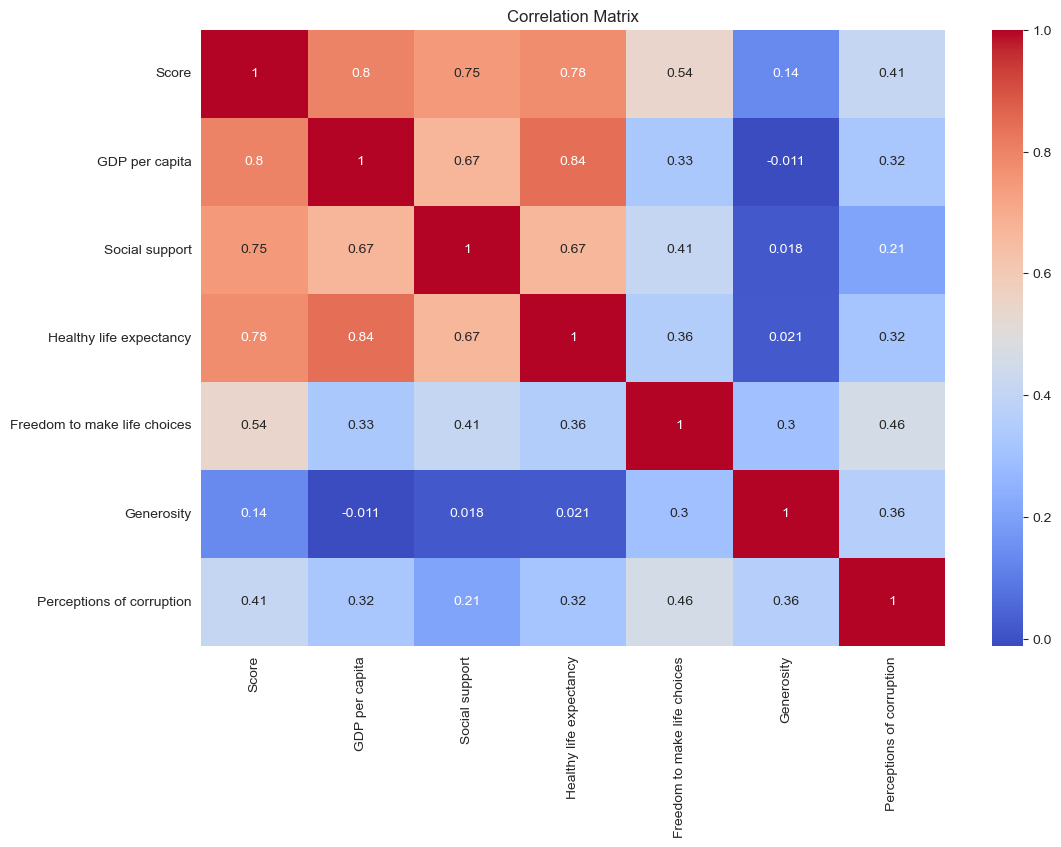

In [7]:
#Visualization of the Correlation Heat Map.
plt.figure(figsize =(12,8)) #Sets the size of Plot.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') #Creates a heatmap. df.corr() = creates a corr table of the dataframe.
plt.title('Correlation Matrix')
plt.show()

### According to the Heat Map:

- We can say that GDP Per Capita has a noticable affection on Health Life Expectancy and Social Support.

- Generosity doesn't have much affection on the Happiness Index Score and so other inputs.

In [8]:
threshold = sum(df.Score)/len(df.Score) #Calculates mean Score.
print('The average score of Happiness Index is: ',threshold)
df["Happiness Level"] = ["Happy" if i > threshold else "Unhappy" for i in df.Score] #Creates a new column 'Happiness Level' and specifies a condition.
print(df['Happiness Level'].value_counts())

The average score of Happiness Index is:  5.375916666666668
Happy      78
Unhappy    78
Name: Happiness Level, dtype: int64


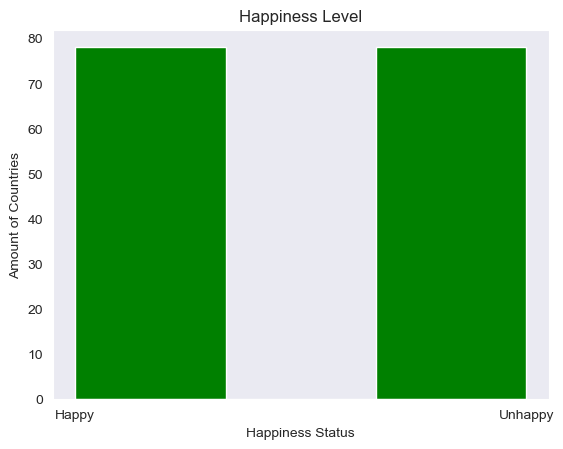

In [9]:
plt.hist(df['Happiness Level'], bins = 3,color = 'Green')
plt.grid()
plt.title('Happiness Level')
plt.xlabel('Happiness Status')
plt.ylabel('Amount of Countries')
plt.show()

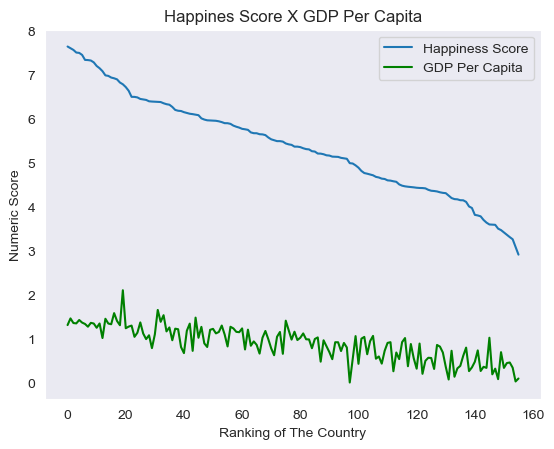

In [10]:
df['Score'].plot(kind = 'line', label = 'Happiness Score')
df['GDP per capita'].plot(kind = 'line', label = 'GDP Per Capita', color = 'green')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('Ranking of The Country')
plt.ylabel('Numeric Score')
plt.title('Happines Score X GDP Per Capita')
plt.show()